## Cargue de datos, importacion librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # connects Colab to your Google Drive

Mounted at /content/drive


In [25]:
path = "/content/drive/MyDrive/Colab Notebooks/InteligenciaArtificial/filterICFES.csv"
df_icfes_completo = pd.read_csv(path)
print(df_icfes_completo.shape)
df_icfes_completo
df_icfes_completo.sort_values(by='ESTU_DEPTO_RESIDE', ascending=False).tail(2)

(371826, 38)


Unnamed: 0 ESTU_NACIONALIDAD  ... PUNT_GLOBAL PERCENTIL_GLOBAL
342562      466599          COLOMBIA  ...         302               86
0                0             SUIZA  ...         244               49

[2 rows x 38 columns]

## Revision datos Colombia 
2.Grafique la correlación general de las pruebas (1 punto)

In [4]:
df_icfes_puntajes = df_icfes_completo[['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']]
df_icfes_puntajes.tail(2)

PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  ...  PUNT_INGLES  PUNT_GLOBAL
371824                    69                57  ...         52.0          290
371825                    58                51  ...         48.0          261

[2 rows x 6 columns]

In [5]:
df_icfes_puntajes.describe()

PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  ...    PUNT_INGLES    PUNT_GLOBAL
count         371826.000000     371826.000000  ...  371826.000000  371826.000000
mean              52.796507         51.861882  ...      47.638508     252.070156
std               10.004242         11.504246  ...      11.197465      48.182734
min                0.000000          0.000000  ...       0.000000       0.000000
25%               46.000000         44.000000  ...      40.000000     215.000000
50%               53.000000         52.000000  ...      46.000000     249.000000
75%               60.000000         60.000000  ...      53.000000     285.000000
max              100.000000        100.000000  ...     100.000000     500.000000

[8 rows x 6 columns]

In [6]:
df_icfes_puntajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371826 entries, 0 to 371825
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   PUNT_LECTURA_CRITICA      371826 non-null  int64  
 1   PUNT_MATEMATICAS          371826 non-null  int64  
 2   PUNT_C_NATURALES          371826 non-null  int64  
 3   PUNT_SOCIALES_CIUDADANAS  371826 non-null  int64  
 4   PUNT_INGLES               371826 non-null  float64
 5   PUNT_GLOBAL               371826 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 17.0 MB


In [16]:
df_icfes_completo['Santander'] = df_icfes_completo[['ESTU_DEPTO_RESIDE']] == 6
df_icfes_completo.tail(2)

Unnamed: 0 ESTU_NACIONALIDAD  ... PERCENTIL_GLOBAL Santander
371824      504870          COLOMBIA  ...               80     False
371825      504871          COLOMBIA  ...               61     False

[2 rows x 39 columns]

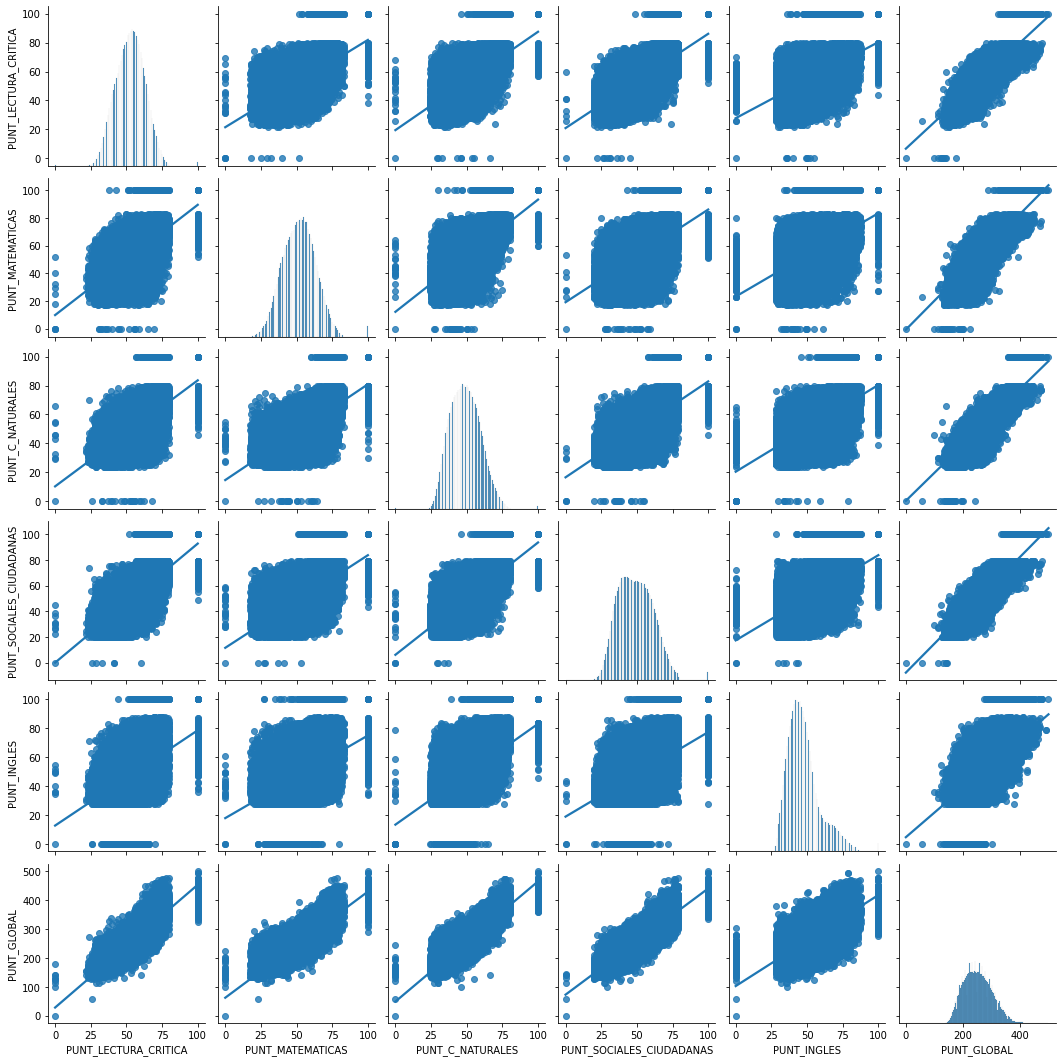

In [ ]:
sns.pairplot(df_icfes_puntajes, kind="reg")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a64323c50>,
      dtype=object)

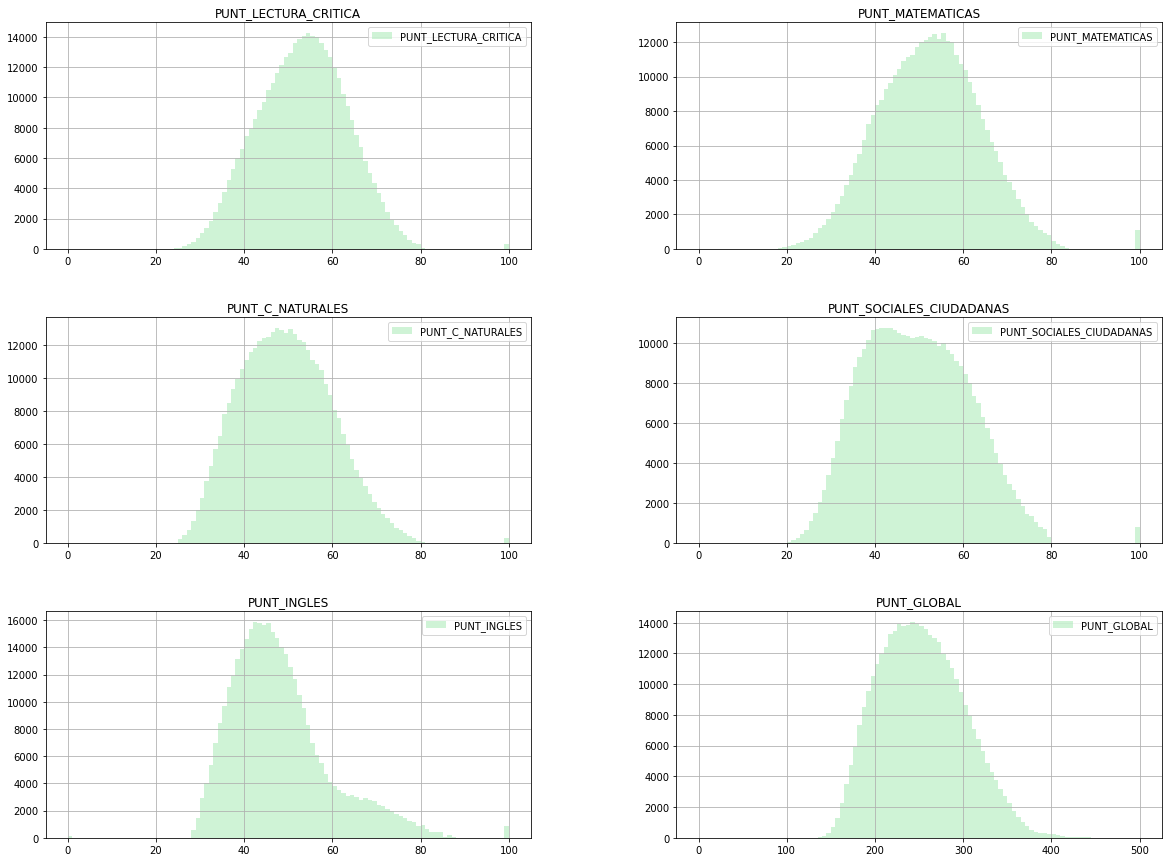

In [17]:
df_icfes_puntajes.hist(figsize = (20, 15), bins=100, alpha=0.5,grid=True, legend=True , color=['#A0E8AF'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a55e8e090>,
      dtype=object)

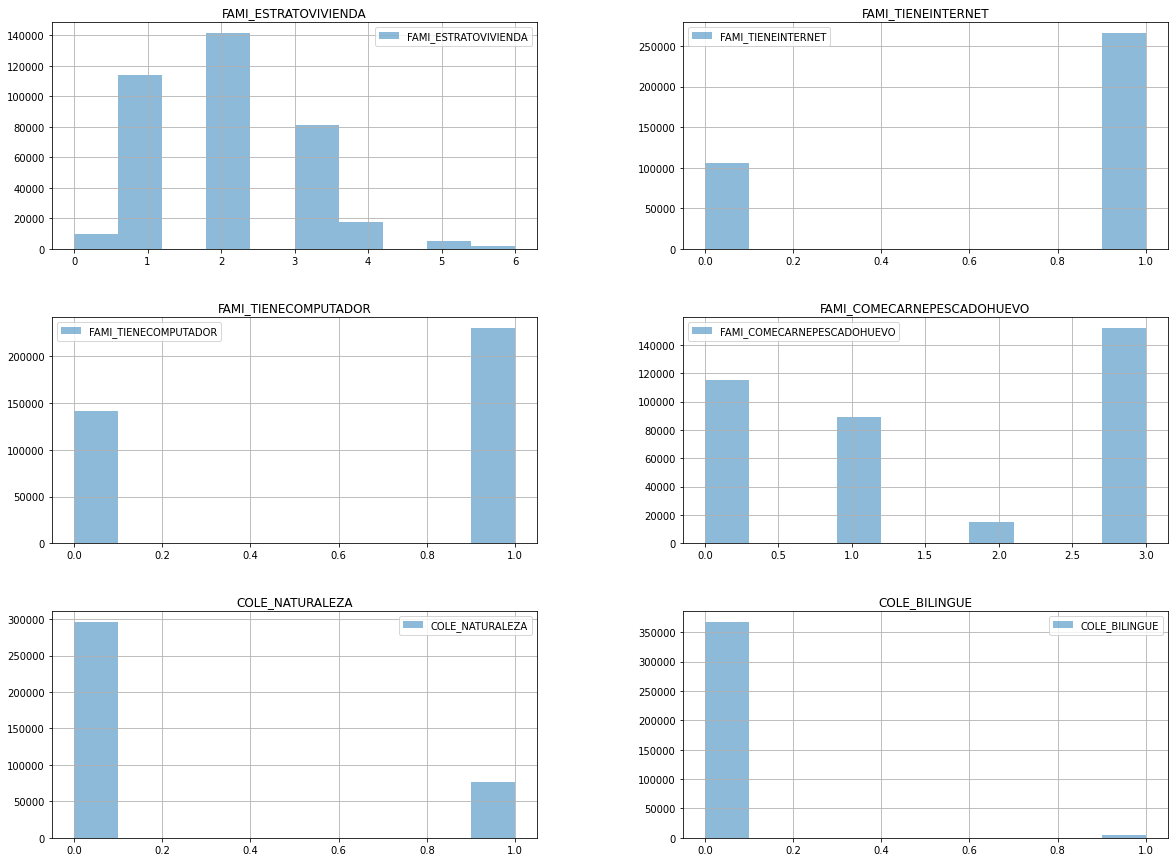

In [18]:
df_icfes_completo_carc_soci_col =   df_icfes_completo[['FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','FAMI_COMECARNEPESCADOHUEVO','COLE_NATURALEZA','COLE_BILINGUE']]
df_icfes_completo_carc_soci_col.hist(figsize = (20, 15), alpha=0.5,grid=True, legend=True )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

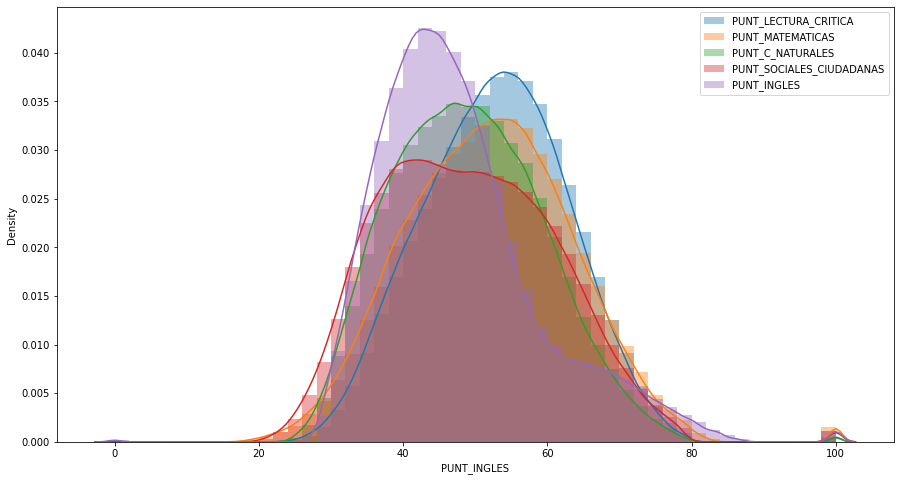

In [19]:
plt.figure(figsize=(15, 8))
sns.distplot(df_icfes_puntajes['PUNT_LECTURA_CRITICA'],label="PUNT_LECTURA_CRITICA")
sns.distplot(df_icfes_puntajes['PUNT_MATEMATICAS'],label="PUNT_MATEMATICAS")
sns.distplot(df_icfes_puntajes['PUNT_C_NATURALES'],label="PUNT_C_NATURALES")
sns.distplot(df_icfes_puntajes['PUNT_SOCIALES_CIUDADANAS'],label="PUNT_SOCIALES_CIUDADANAS")
sns.distplot(df_icfes_puntajes['PUNT_INGLES'],label="PUNT_INGLES")

plt.legend()
plt.show()

Se puede apreciar que el Puntaje en Ingles y el puntaje en Sociales son los mejores mientras que Lectura critica y Matematicas tienen las distribuciones con mayores puntajes 

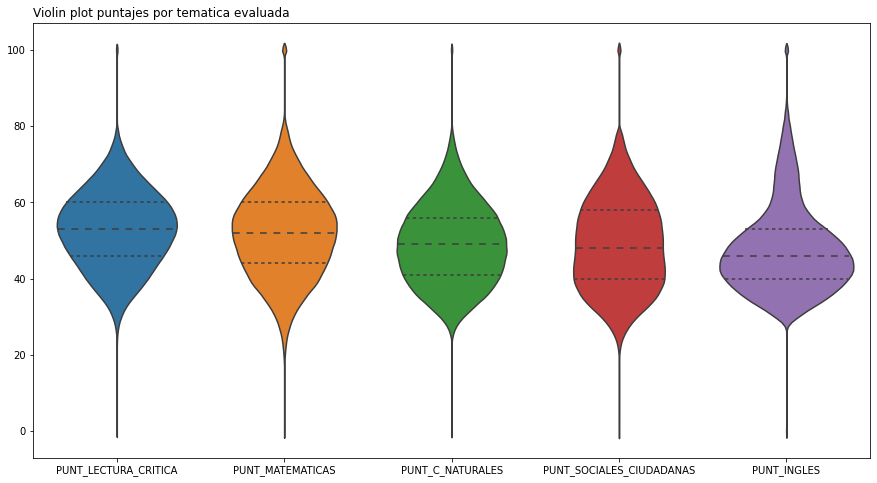

In [20]:
df_icfes_puntajes_materias = df_icfes_puntajes.drop(columns=['PUNT_GLOBAL'])
plt.figure(figsize=(15, 8))
sns.violinplot(data=df_icfes_puntajes_materias, inner="quartile")
plt.title("Violin plot puntajes por tematica evaluada", loc="left")
plt.show()

## Revision datos Santander

3. Grafique la correlación general de las variables pero sólo de su departamento. Concluya cómo le va a su departamento con respecto a las pruebas generales (1 punto)

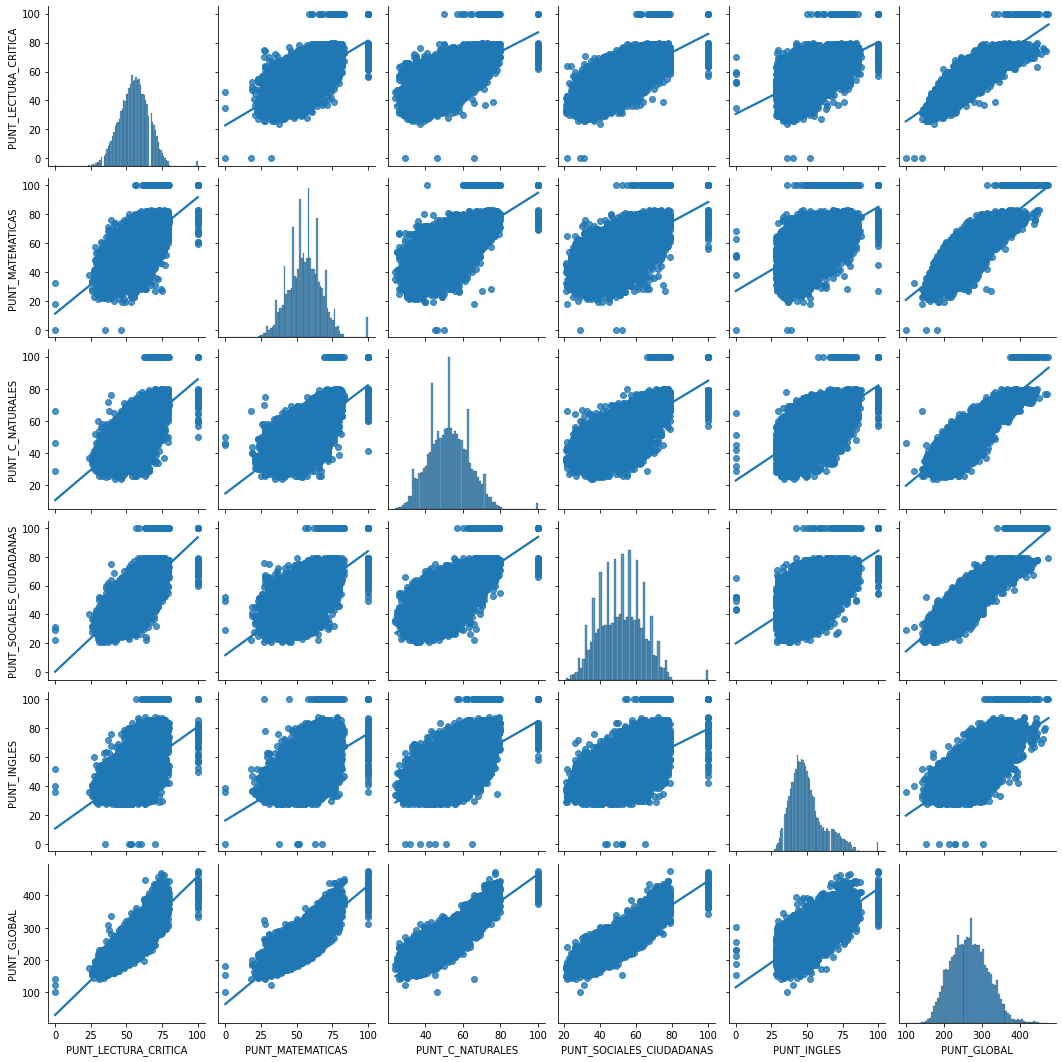

In [12]:
sns.pairplot(df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']], kind="reg")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a6450ec50>,
      dtype=object)

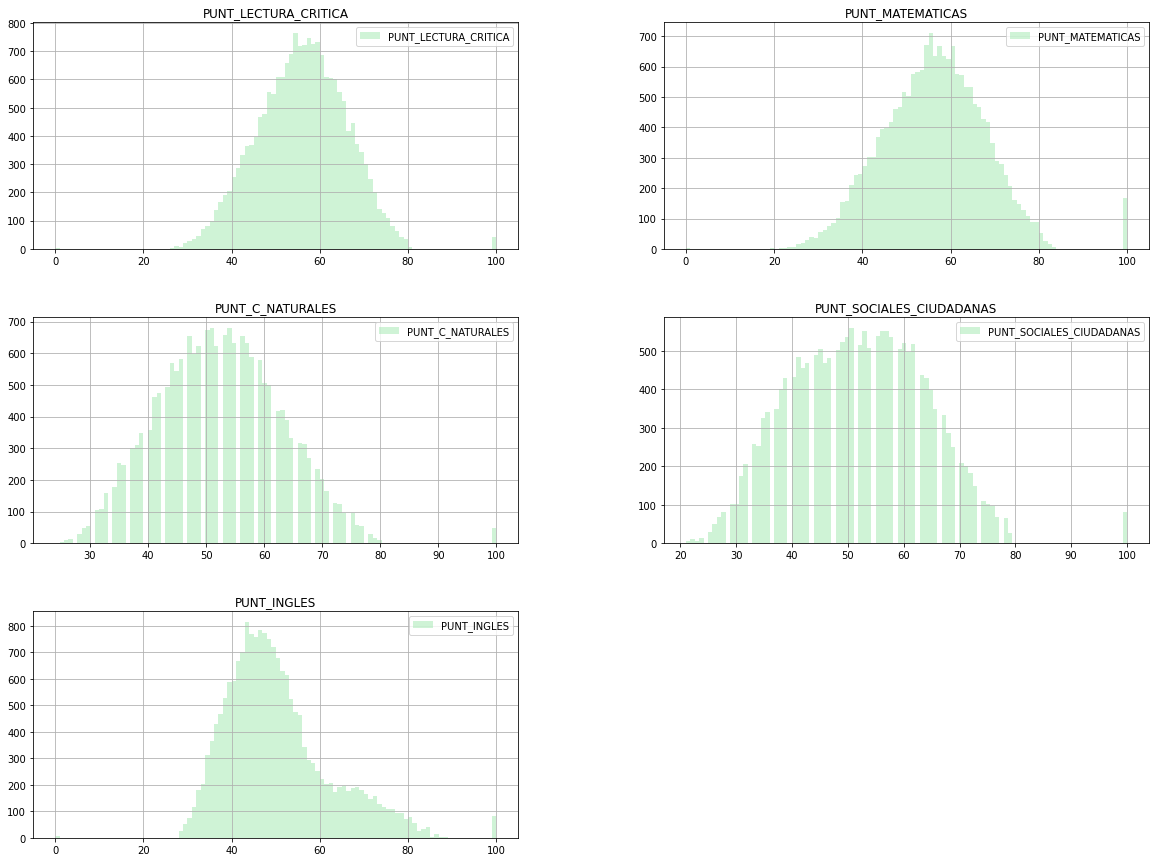

In [21]:
df_icfes_completo_carc_punt =  df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
df_icfes_completo_carc_punt.hist(figsize = (20, 15), bins=100, alpha=0.5,grid=True, legend=True , color=['#A0E8AF'] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a4ccdbe10>,
      dtype=object)

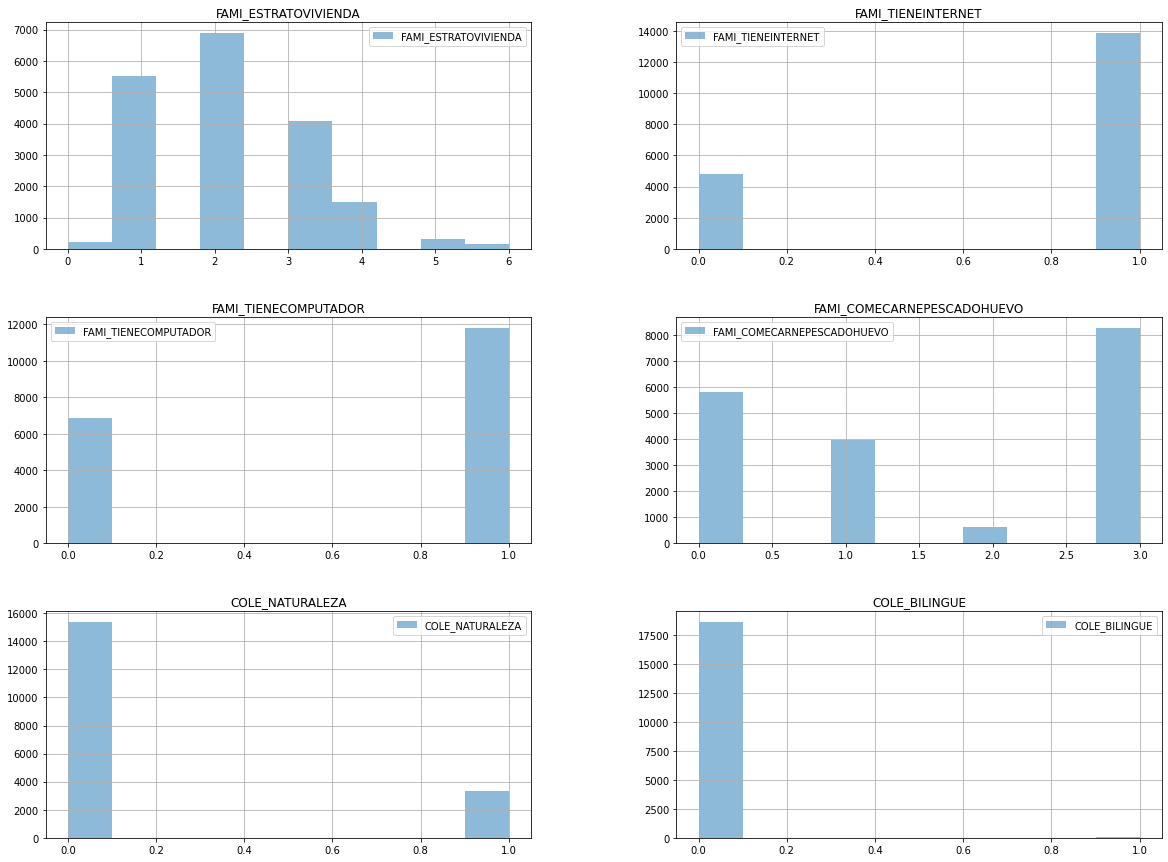

In [22]:
df_icfes_completo_carc_soci_sant =   df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR','FAMI_COMECARNEPESCADOHUEVO','COLE_NATURALEZA','COLE_BILINGUE']]
df_icfes_completo_carc_soci_sant.hist(figsize = (20, 15), alpha=0.5,grid=True, legend=True )

4. Grafique al menos un histograma, un “violinplot” y un gráfico libre con las variables del icfes que le permitan concluir las fortalezas y desventajas de los estudiantes en Colombia (1 punto) 

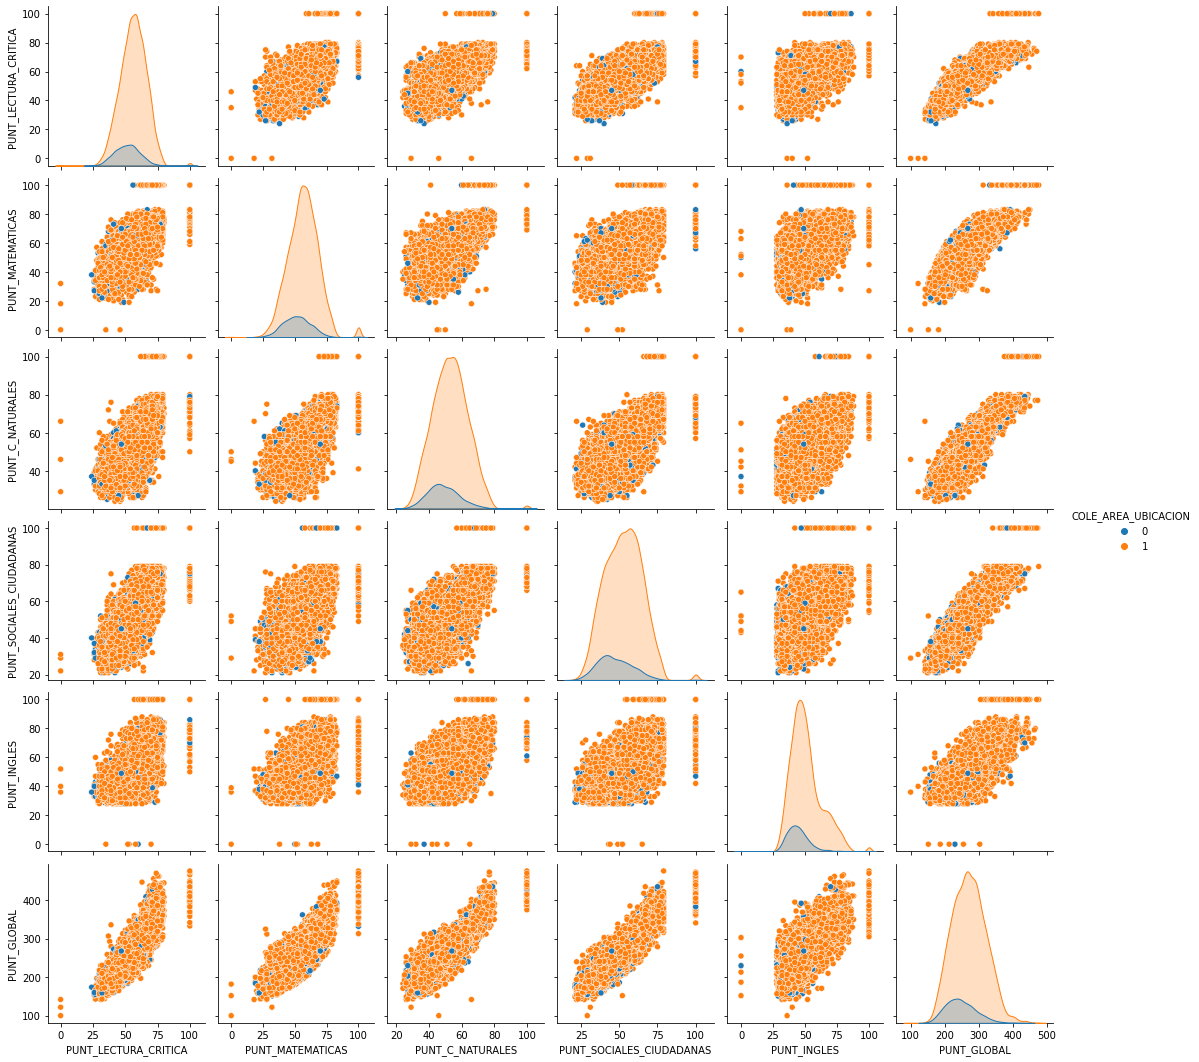

In [27]:
sns.pairplot(df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['COLE_AREA_UBICACION','PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']]
             , hue="COLE_AREA_UBICACION")

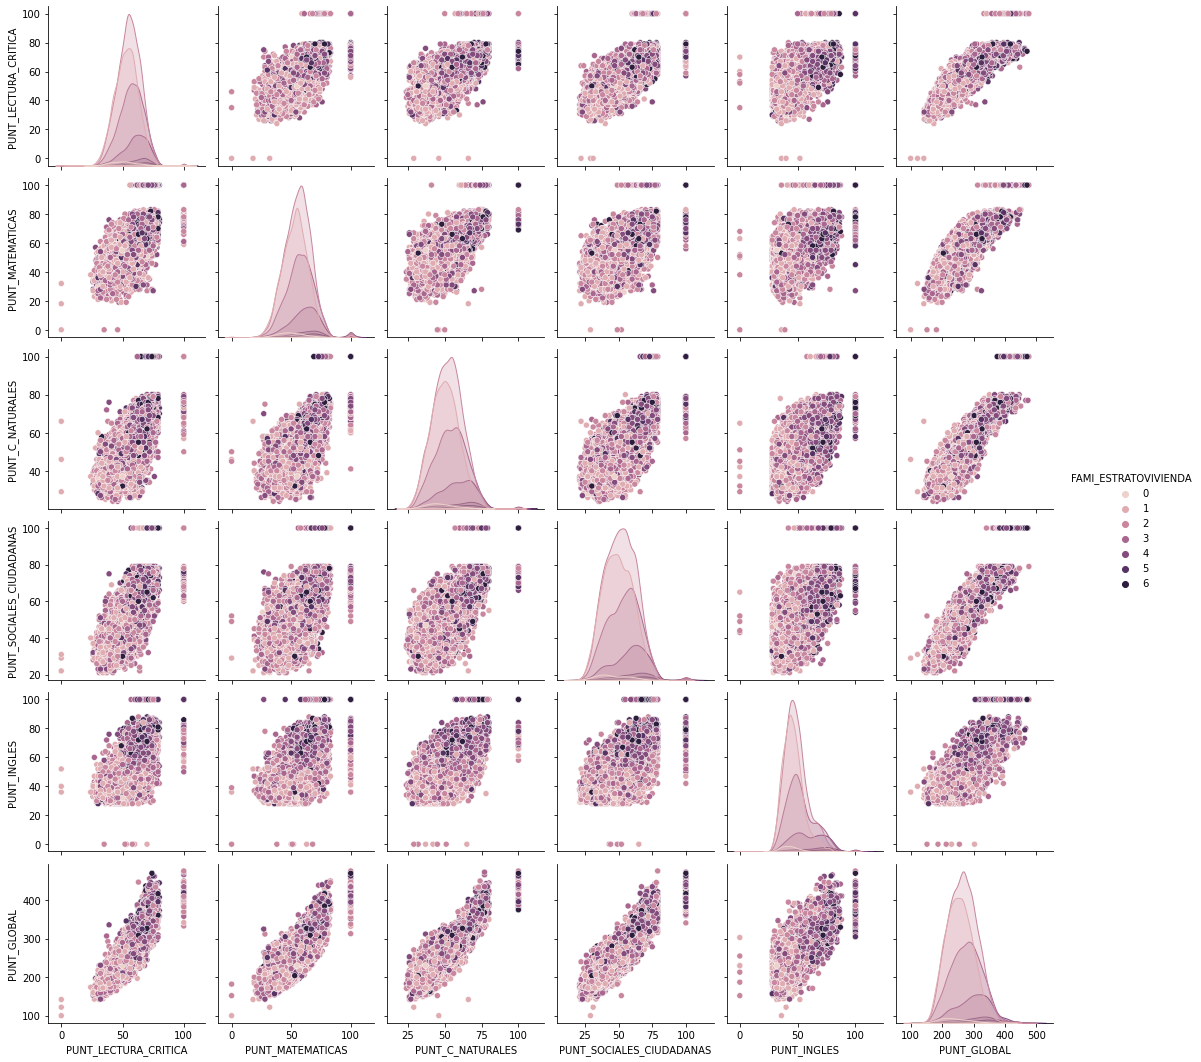

In [24]:
sns.pairplot(df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['FAMI_ESTRATOVIVIENDA','PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']]
             , hue="FAMI_ESTRATOVIVIENDA")

Al buscar correlacion entre puntajes en las diferentes categorias evaluadas asi como el puntaje global con el la distribucion de estratos podemos ver como la gran parte de la poblacion Santanderiana se encuentre en estratos 1,2 y 3 siendo estos puntajes por lo generl de la media para abajo mientras que los estratos 4 y 5 son un porcentaje mucho mas pequeño de poblacion y se enceuntran por lo general por encima de la media.

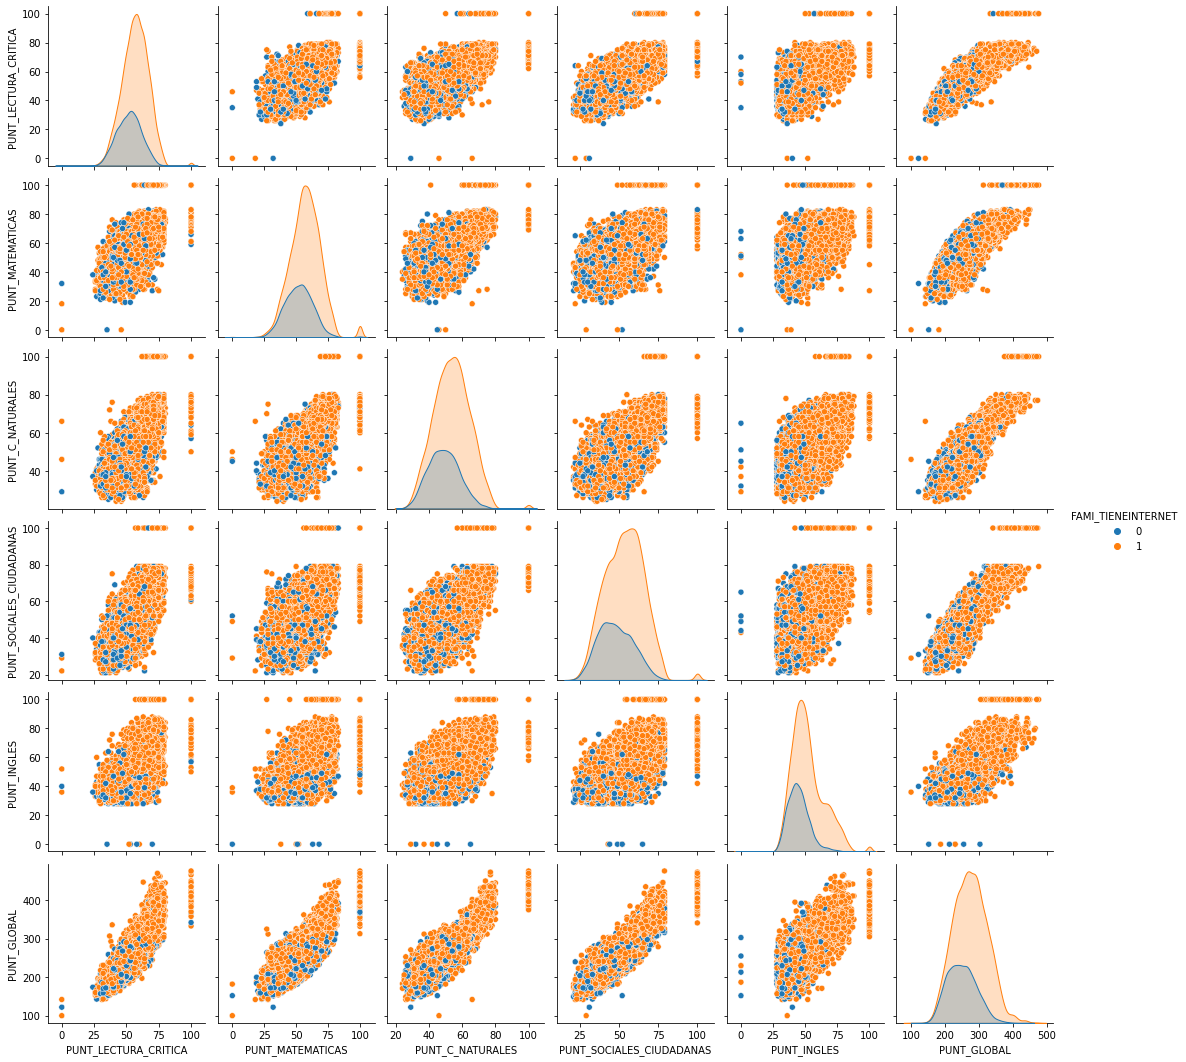

In [ ]:
sns.pairplot(df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['FAMI_TIENEINTERNET','PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']]
             , hue="FAMI_TIENEINTERNET")

Al buscar correlacion entre puntajes en las diferentes categorias evaluadas asi como el puntaje global con el hecho de tener (1) o no (0) internet. Creando una relacion casi de 3 a 1 a favor de las personas que tenian. Los mejores resultados en todas las materias estan asociados al internet siendo este un factor diferencial que puede llegar a generar cerca de 25 puntos de diferencia en el puntaje de ingles.

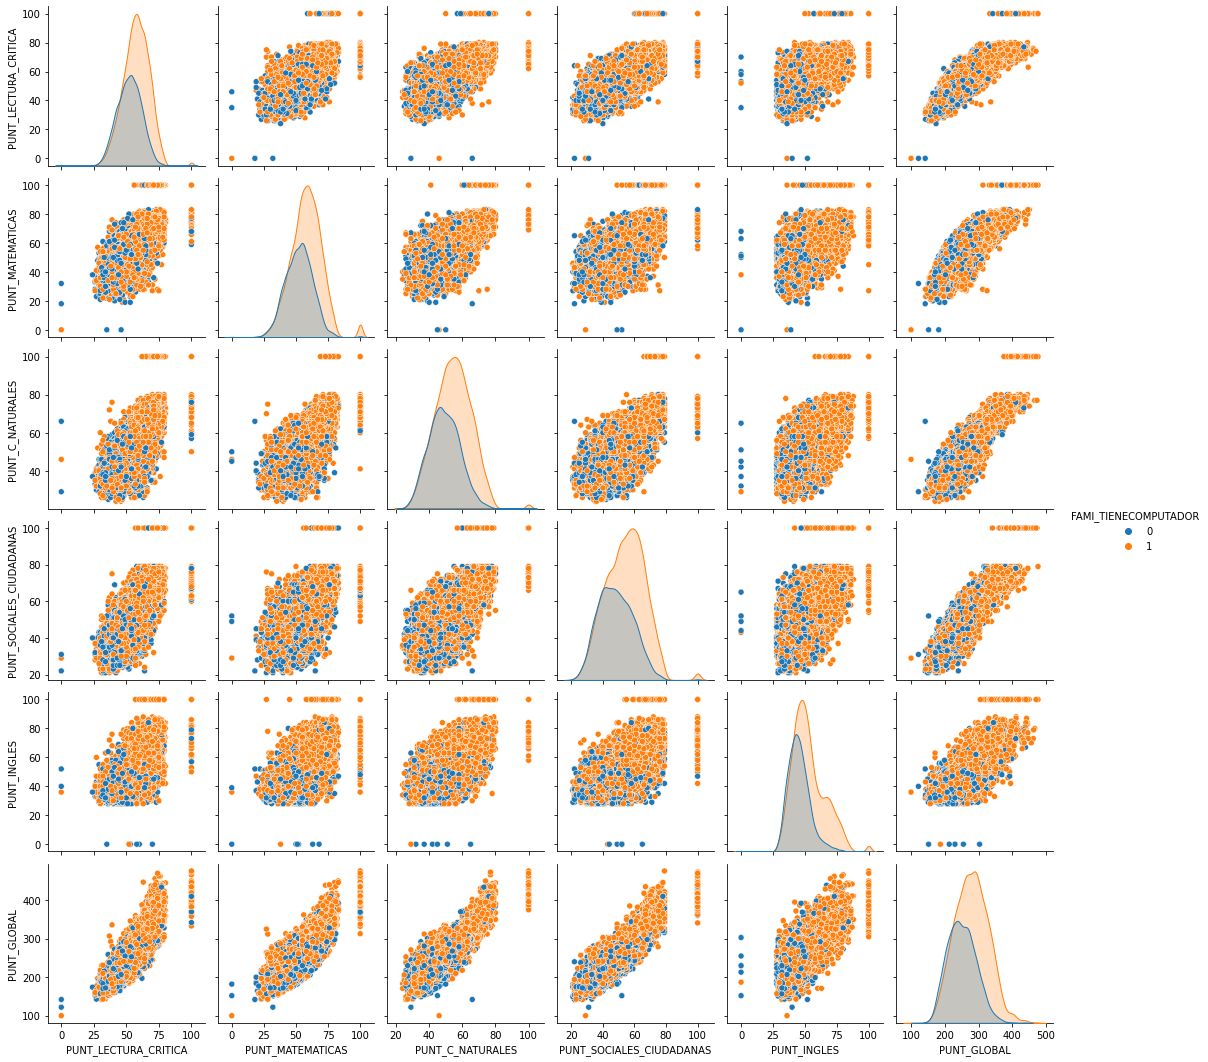

In [ ]:
sns.pairplot(
    df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['FAMI_TIENECOMPUTADOR','PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES','PUNT_GLOBAL']]
             , hue="FAMI_TIENECOMPUTADOR")

Al buscar correlacion entre puntajes en las diferentes categorias evaluadas asi como el puntaje global con el hecho de tener (1) o no (0) un computador se puede apreciar que los mejores puntajes globales tienen computador mientras que los puntajes mas bajos se vinculan con no tener computado. Sin embargo a nivel general es mayor la poblacion con acceso a un computador aun asi es mas marcada la diferencia que la que se presento en cuanto acceso a internet 

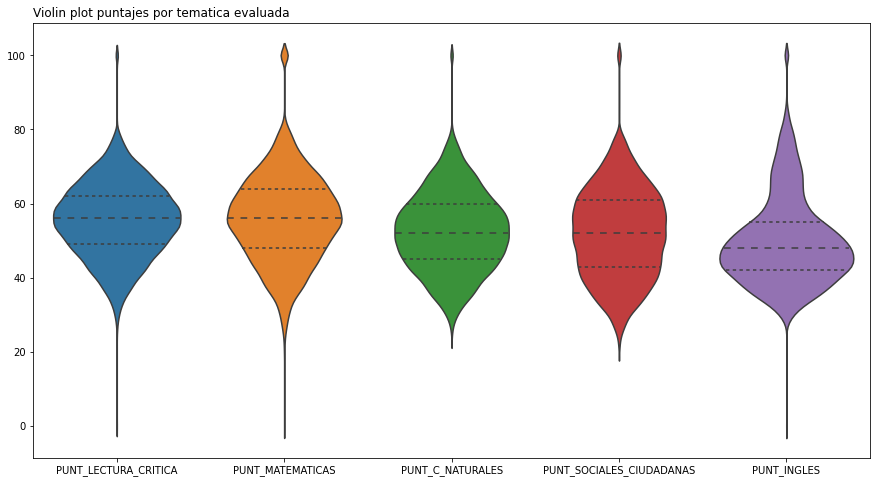

In [ ]:
df_icfes_puntajes_materias = df_icfes_puntajes.drop(columns=['PUNT_GLOBAL'])
plt.figure(figsize=(15, 8))
sns.violinplot(
    data= df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)][['PUNT_LECTURA_CRITICA','PUNT_MATEMATICAS','PUNT_C_NATURALES','PUNT_SOCIALES_CIUDADANAS','PUNT_INGLES']]
    , inner="quartile")
plt.title("Violin plot puntajes por tematica evaluada", loc="left")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

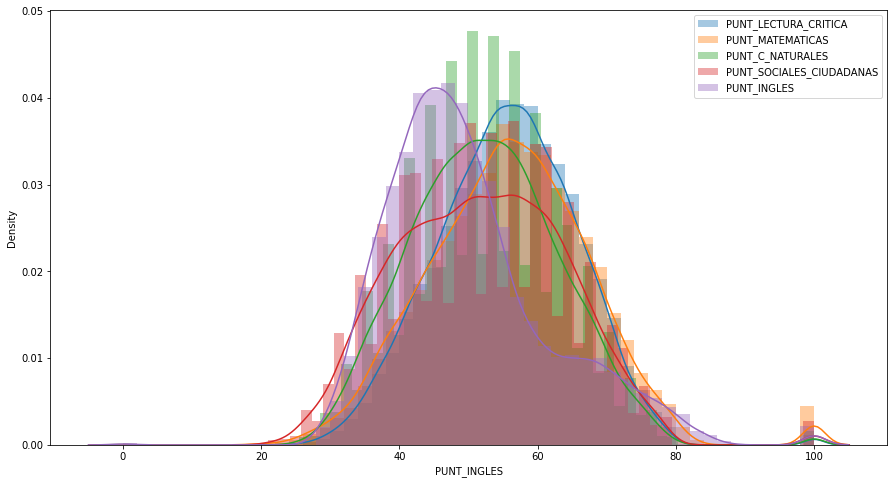

In [ ]:
plt.figure(figsize=(15, 8))
sns.distplot(df_icfes__Santander_punt['PUNT_LECTURA_CRITICA'])
sns.distplot(df_icfes__Santander_punt['PUNT_MATEMATICAS'])
sns.distplot(df_icfes__Santander_punt['PUNT_C_NATURALES'])
sns.distplot(df_icfes__Santander_punt['PUNT_SOCIALES_CIUDADANAS'])
sns.distplot(df_icfes__Santander_punt['PUNT_INGLES'],label="Puntajes")

plt.legend()
plt.show()

al ver las distribuciones de desidad de las diferentes materias evaluadas en la prueba del Icfes se puede apreciar que Santander destaca en Lectura critica y Matematicas

## Revision datos Colombia vs Santander 
5. Grafique al menos un histograma, un “violinplot” y un gráfico libre con las variables del icfes en su departamento que le permitan concluir las fortalezas y desventajas de los estudiantes en su departamento con respecto a colombia. Concluya con los requerimientos al gobernador justificado en los datos analizados (2 puntos)

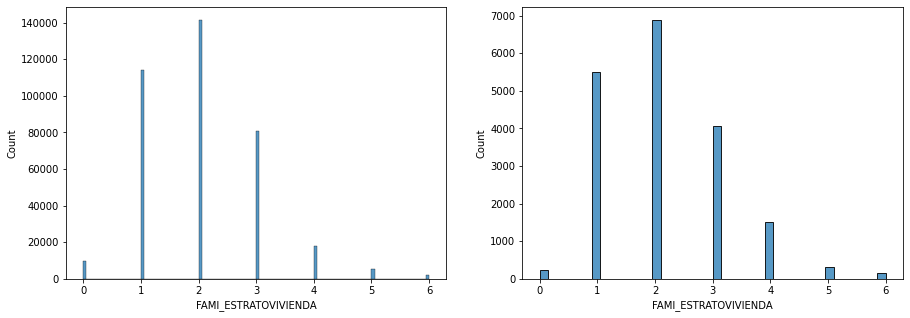

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = plt.subplot(121, projection='rectilinear')
ax1 = (sns.histplot(df_icfes_completo_carc_soci_col['FAMI_ESTRATOVIVIENDA']))

ax2 = plt.subplot(122, projection='rectilinear')
ax2 = (sns.histplot(df_icfes_completo_carc_soci_sant['FAMI_ESTRATOVIVIENDA']))


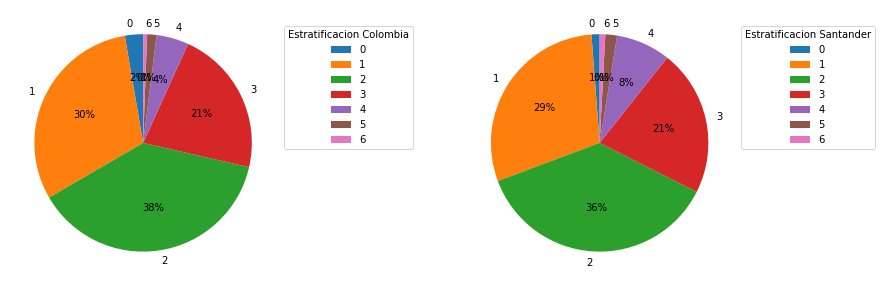

In [ ]:
fig = plt.figure(figsize=(15,5))

labels_1 = '0','1', '2', '3', '4', '5', '6'

ax1 = plt.subplot(121, projection='rectilinear')
ax1 = (plt.pie(df_icfes_completo_carc_soci_col.groupby('FAMI_ESTRATOVIVIENDA').size(), labels = labels_1, autopct='%1.1d%%', startangle=90))
ax1 = (plt.legend(labels_1, bbox_to_anchor = (1, 0.95), title="Estratificacion Colombia"))

ax2 = plt.subplot(122, projection='rectilinear')
ax2 = (plt.pie(df_icfes_completo_carc_soci_sant.groupby('FAMI_ESTRATOVIVIENDA').size(), labels = labels_1, autopct='%1.1d%%', startangle=90))
ax2 = (plt.legend(labels_1, bbox_to_anchor = (1, 0.95), title="Estratificacion Santander"))

Al comparar la distribucion en porcentajes de los estratos a nivel Colombia y Santander no se encuentrar grandes diferencias, una de estas es el doble de porcenaje estrato 4 pasando de 4% a 8% sin embargo la gran parte de la poblacion en se encuentre entre estratos 1,2 y 3.

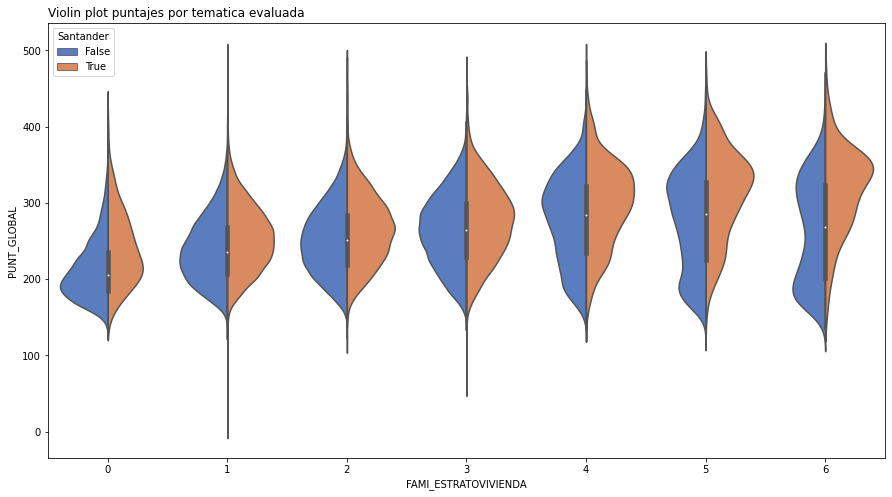

In [ ]:
plt.figure(figsize=(15, 8))

sns.violinplot(x=df_icfes_completo['FAMI_ESTRATOVIVIENDA'],  
               y=df_icfes_completo['PUNT_GLOBAL'], hue="Santander",
               data=df_icfes_completo, palette="muted", split=True)

plt.title("Violin plot puntaje global Santander vs Colombia por estrato", loc="left")
plt.show()

Al comparar Santander con resto del pais en el puntaje global de la prueba icfes podemos ver que los mejores puntajes estan relacionados con estratos mas altos en las dos poblaciones

Se procede a restringir los registros del dataset para que solo muestre datos de Santader con la intension de poder usar la funcion describe para obtener las caracteristicas estadisticas tanto de la poblacion a nivel Colombia como a nivel Santander.

In [ ]:
df_icfes_Santander_completo = df_icfes_completo[(df_icfes_completo['ESTU_DEPTO_RESIDE']==6)]
df_icfes_Santander_completo.tail(2)

Unnamed: 0 ESTU_NACIONALIDAD  ... PERCENTIL_GLOBAL Santander
364776      496111          COLOMBIA  ...               61      True
370352      503040          COLOMBIA  ...               66      True

[2 rows x 39 columns]

In [ ]:
df_PT_LECT_CRIT_DES = pd.DataFrame({'PT_LECT_CRIT_COL': df_icfes_puntajes['PUNT_LECTURA_CRITICA'].describe()})
df_PT_MATEM_DES = pd.DataFrame({'PT_MATEM_COL': df_icfes_puntajes['PUNT_MATEMATICAS'].describe()})
df_PT_C_NATURA_DES = pd.DataFrame({'PT_C_NATURA_COL': df_icfes_puntajes['PUNT_C_NATURALES'].describe()})
df_PT_SOCIAL_DES = pd.DataFrame({'PT_SOCIAL_COL': df_icfes_puntajes['PUNT_SOCIALES_CIUDADANAS'].describe()})
df_PT_INGLES_DES = pd.DataFrame({'PT_INGLES_COL': df_icfes_puntajes['PUNT_INGLES'].describe()})

df_PT_LECT_CRIT_DES_SAN = pd.DataFrame({'PT_LECT_CRIT_SAN': df_icfes_Santander_completo['PUNT_LECTURA_CRITICA'].describe()})
df_PT_MATEM_DES_SAN = pd.DataFrame({'PT_MATEM_SAN': df_icfes_Santander_completo['PUNT_MATEMATICAS'].describe()})
df_PT_C_NATURA_DES_SAN = pd.DataFrame({'PT_C_NATURA_SAN': df_icfes_Santander_completo['PUNT_C_NATURALES'].describe()})
df_PT_SOCIAL_DES_SAN = pd.DataFrame({'PT_SOCIAL_SAN': df_icfes_Santander_completo['PUNT_SOCIALES_CIUDADANAS'].describe()})
df_PT_INGLES_DES_SAN = pd.DataFrame({'PT_INGLES_SAN': df_icfes_Santander_completo['PUNT_INGLES'].describe()})

df_materias_colimbia_des = pd.concat([df_PT_LECT_CRIT_DES, df_PT_LECT_CRIT_DES_SAN,
                                      df_PT_MATEM_DES, df_PT_MATEM_DES_SAN,
                                      df_PT_C_NATURA_DES, df_PT_C_NATURA_DES_SAN, 
                                      df_PT_SOCIAL_DES, df_PT_SOCIAL_DES_SAN,
                                      df_PT_INGLES_DES, df_PT_INGLES_DES_SAN], axis=1)

df_materias_colimbia_des

PT_LECT_CRIT_COL  PT_LECT_CRIT_SAN  ...  PT_INGLES_COL  PT_INGLES_SAN
count     371826.000000      18677.000000  ...  371826.000000   18677.000000
mean          52.796507         55.474702  ...      47.638508      49.860095
std           10.004242          9.985257  ...      11.197465      11.877921
min            0.000000          0.000000  ...       0.000000       0.000000
25%           46.000000         49.000000  ...      40.000000      42.000000
50%           53.000000         56.000000  ...      46.000000      48.000000
75%           60.000000         62.000000  ...      53.000000      55.000000
max          100.000000        100.000000  ...     100.000000     100.000000

[8 rows x 10 columns]

In [ ]:
df_materias_colimbia_des['PT_LECT_CRIT_DES_DIF'] = df_materias_colimbia_des['PT_LECT_CRIT_SAN']  - df_materias_colimbia_des['PT_LECT_CRIT_COL'] 
df_materias_colimbia_des['PT_MATEM_DES_DIF'] = df_materias_colimbia_des['PT_MATEM_SAN']  - df_materias_colimbia_des['PT_MATEM_COL'] 
df_materias_colimbia_des['PT_C_NATURA_DES_DIF'] = df_materias_colimbia_des['PT_C_NATURA_SAN']  - df_materias_colimbia_des['PT_C_NATURA_COL'] 
df_materias_colimbia_des['PT_SOCIAL_DES_DIF'] = df_materias_colimbia_des['PT_SOCIAL_SAN']  - df_materias_colimbia_des['PT_SOCIAL_COL'] 
df_materias_colimbia_des['PT_INGLES_DES_DIF'] = df_materias_colimbia_des['PT_INGLES_SAN']  - df_materias_colimbia_des['PT_INGLES_COL'] 

df_materias_colimbia_des_transposed = df_materias_colimbia_des.T

al comparar las medias a nivel Colombia y a nivel Santander se puede apreciar que Santader se encuentra sobre la media nacional en todas las partes de la prueba, sin embargo la ventaja que se tiene es menor en Ingles y Lectura Critica por lo que se procedera a revisar a detalle como se encuentran estas dos partes de la prueba con respecto a variables socioeconomicas.

In [ ]:
df_materias_diff = df_materias_colimbia_des_transposed[['mean','std','min','25%','50%','75%']].T
df_materias_diff = df_materias_diff[['PT_LECT_CRIT_DES_DIF','PT_MATEM_DES_DIF','PT_C_NATURA_DES_DIF','PT_SOCIAL_DES_DIF','PT_INGLES_DES_DIF']]
df_materias_diff

PT_LECT_CRIT_DES_DIF  ...  PT_INGLES_DES_DIF
mean              2.678195  ...           2.221587
std              -0.018985  ...           0.680456
min               0.000000  ...           0.000000
25%               3.000000  ...           2.000000
50%               3.000000  ...           2.000000
75%               2.000000  ...           2.000000

[6 rows x 5 columns]

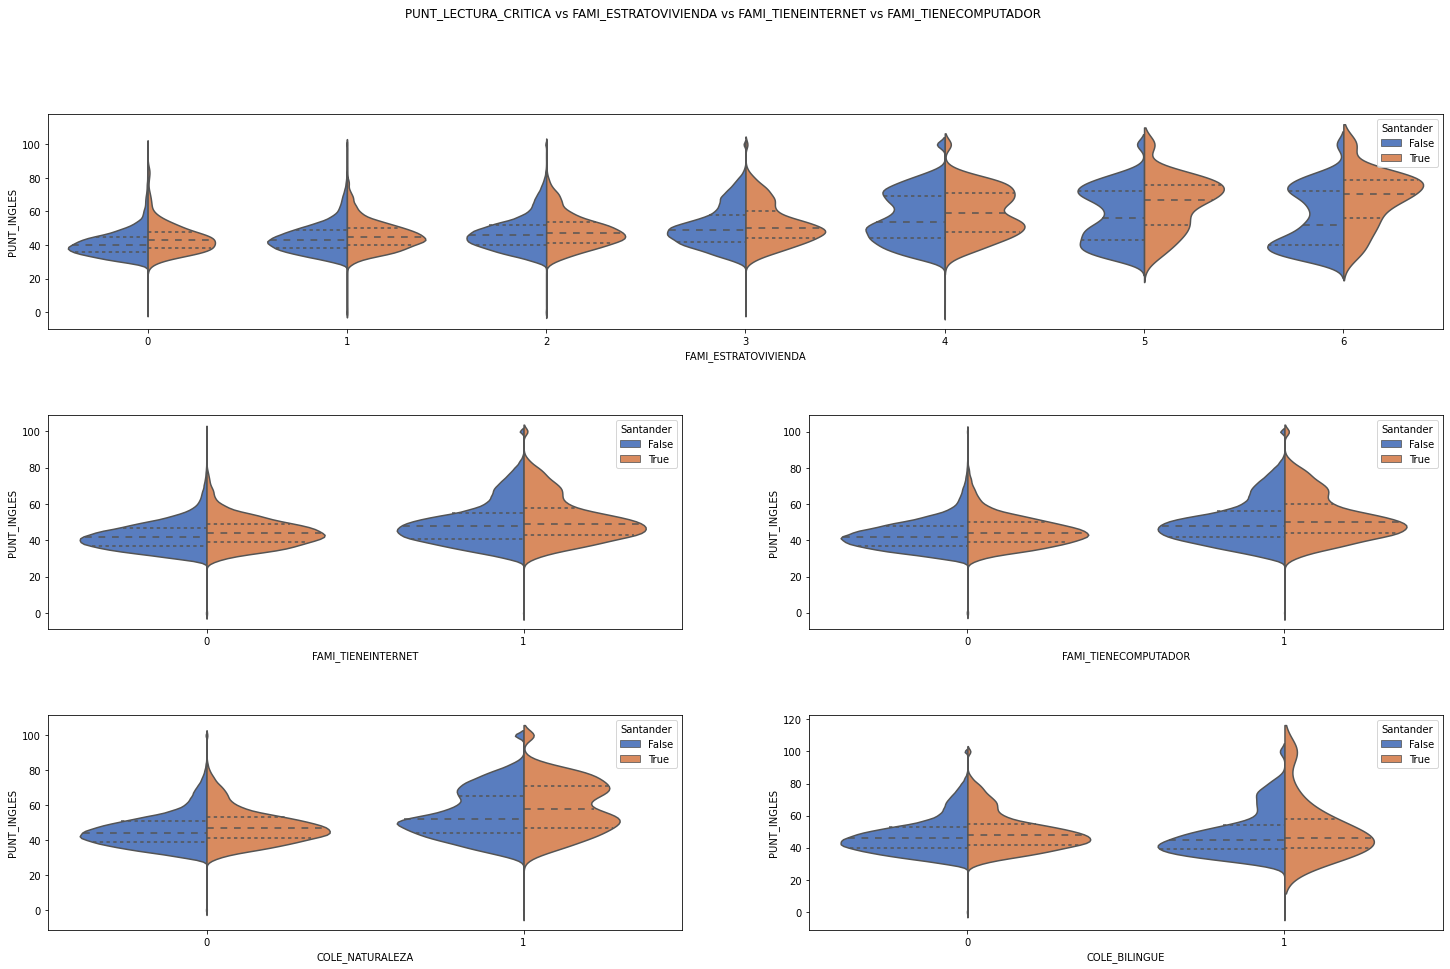

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(25, 15), sharey=True)

fig.suptitle('PUNT_LECTURA_CRITICA vs FAMI_ESTRATOVIVIENDA vs FAMI_TIENEINTERNET vs FAMI_TIENECOMPUTADOR')

Grid_plot = plt.GridSpec(3, 2, wspace = 0.2, hspace = 0.4)
  
plt.subplot(Grid_plot[0, 0:])
sns.violinplot(x=df_icfes_completo['FAMI_ESTRATOVIVIENDA'],  
               y=df_icfes_completo['PUNT_INGLES'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[1, 0])
sns.violinplot(x=df_icfes_completo['FAMI_TIENEINTERNET'],  
               y=df_icfes_completo['PUNT_INGLES'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[1, 1])
sns.violinplot(x=df_icfes_completo['FAMI_TIENECOMPUTADOR'], 
               y=df_icfes_completo['PUNT_INGLES'], hue="Santander", 
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[2, 0])
sns.violinplot(x=df_icfes_completo['COLE_NATURALEZA'],  
               y=df_icfes_completo['PUNT_INGLES'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[2, 1])
sns.violinplot(x=df_icfes_completo['COLE_BILINGUE'], 
               y=df_icfes_completo['PUNT_INGLES'], hue="Santander", 
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

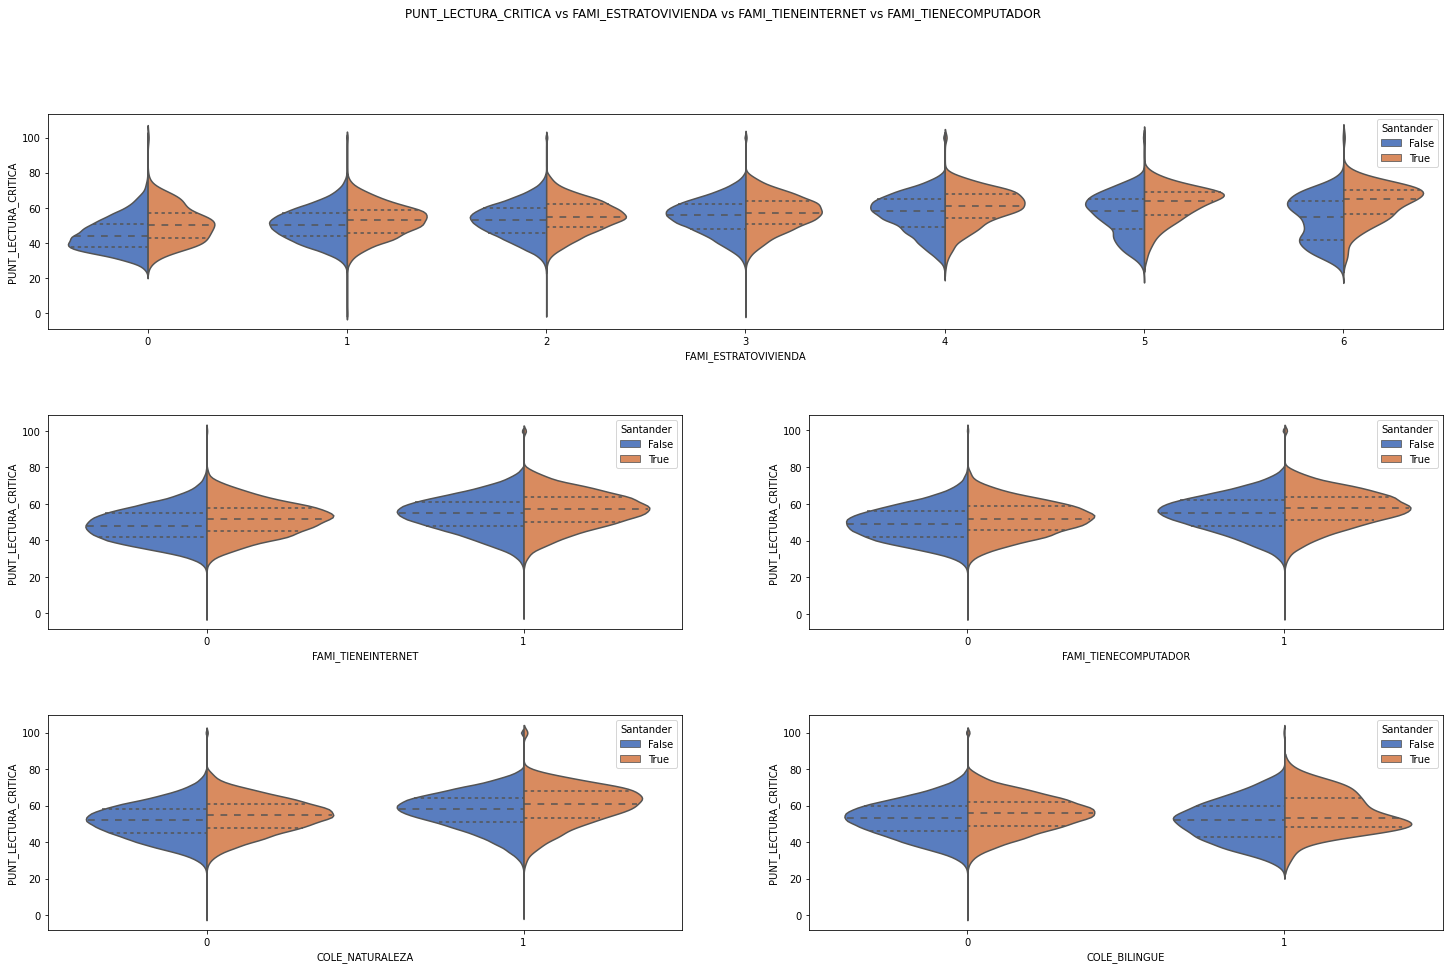

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(25, 15), sharey=True)

fig.suptitle('PUNT_LECTURA_CRITICA vs FAMI_ESTRATOVIVIENDA vs FAMI_TIENEINTERNET vs FAMI_TIENECOMPUTADOR')

Grid_plot = plt.GridSpec(3, 2, wspace = 0.2, hspace = 0.4)
  
plt.subplot(Grid_plot[0, 0:])
sns.violinplot(x=df_icfes_completo['FAMI_ESTRATOVIVIENDA'],  
               y=df_icfes_completo['PUNT_LECTURA_CRITICA'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[1, 0])
sns.violinplot(x=df_icfes_completo['FAMI_TIENEINTERNET'],  
               y=df_icfes_completo['PUNT_LECTURA_CRITICA'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[1, 1])
sns.violinplot(x=df_icfes_completo['FAMI_TIENECOMPUTADOR'], 
               y=df_icfes_completo['PUNT_LECTURA_CRITICA'], hue="Santander", 
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[2, 0])
sns.violinplot(x=df_icfes_completo['COLE_NATURALEZA'],  
               y=df_icfes_completo['PUNT_LECTURA_CRITICA'], hue="Santander",
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)

plt.subplot(Grid_plot[2, 1])
sns.violinplot(x=df_icfes_completo['COLE_BILINGUE'], 
               y=df_icfes_completo['PUNT_LECTURA_CRITICA'], hue="Santander", 
               data=df_icfes_completo, palette="muted", inner="quartile", split=True)


Resumen de conclusiones segun los datos analisados

*  El departamento de Santander tiene mejores estadísticas que el promedio nacional
*   Las dos materias en las que no le va tan bien al departamento son Ingles que a nivel nacional es la de menores puntajes en promedio y lectura crítica que a nivel nacional se encuentra entre las mejores con Matemáticas.
*   Revisando las variables socio económicas se encuentra que dentro de la población que maneja menores puntajes en estas áreas de evaluadas presentan casi en su totalidad estratos 1, 2 y 3. Puntualmente esta población con bajo desempeño en su mayoría carece tanto de internet como de computador, sin embargo, es más habitual que no tengan computador. Así mismo los puntajes más bajos también están relacionados con áreas no urbanas.
*   También es importante destacar que a pesar de que los estudiantes de Santander en general presenten mayores puntajes de la media nacional, la parte de la población que no tiene un buen desempeño también tiene en común en su gran mayoría que son estratos 1 o 2 y no tienen internet ni computador.
*   Como recomendación final se aconseja en primera instancia aumentar la cobertura de internet enfocando esfuerzos en zonas no urbanas pero densamente pobladas, posterior a esto aumentar los niveles de cobertura en zonas urbanas, para continuar con la cobertura de computadores para menores de edad.
*   ya la última recomendación, pero más a futuro seria disminuir el volumen de personas en estratos 1 y 2 para aumentar la clase media alta de estratos 3 y 4 enfocando y capacitando a las nuevas generaciones en tecnologías de la 4 revolución para que sean motores de cambio en sus hogares y rompan el ciclo de precariedad.









In [13]:
%cd drive/MyDrive/Colab\ Notebooks/InteligenciaArtificial/

/content/drive/MyDrive/Colab Notebooks/InteligenciaArtificial


In [14]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-

In [29]:
!jupyter nbconvert --to pdf Reto_1_AI_2021_1.ipynb

[NbConvertApp] Converting notebook Reto_1_AI_2021_1.ipynb to pdf
[NbConvertApp] Support files will be in Reto_1_AI_2021_1_files/
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] Making directory ./Reto_1_AI_2021_1_files
[NbConvertApp] M